<a href="https://colab.research.google.com/github/sneha-4515/Data_science_projects/blob/main/OLA_CASE_STUDY_ola_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)

Tenure information (joining date, Last Date)

Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
!gdown 105CLpdxohh-FpgeAllfx30bujSKI0rNN
df = pd.read_csv("ola_driver_scaler.csv")  # Make sure this file is in the same directory
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=105CLpdxohh-FpgeAllfx30bujSKI0rNN
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 126MB/s]
   Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN

In [ ]:
ola_driver= df.copy()

In [ ]:
ola_driver.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

# EDA(Exploratory Data Analysis)

In [ ]:
print(ola_driver.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB
None


MMM-YY , CITY, DATEOFJOINING, LASTWORKINGDATE are object data type rest are in int & float

In [ ]:
print("Total no of rows:",ola_driver.shape[0])
print("Total no of Columns:",ola_driver.shape[1])

Total no of rows: 19104
Total no of Columns: 14


In [ ]:
ola_driver.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


Conversion of Object columns to date

In [ ]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

Checking null values

In [ ]:
ola_driver.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


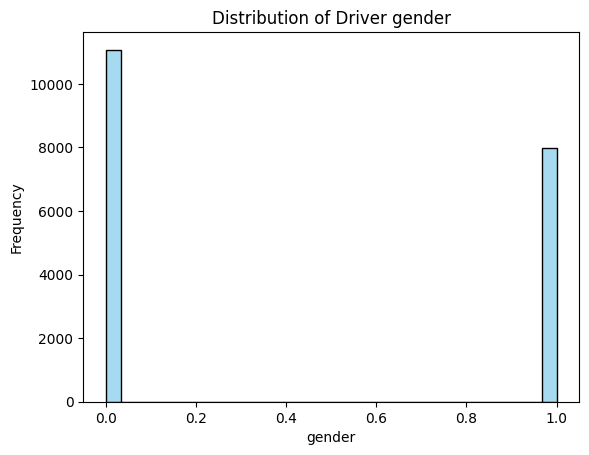

In [ ]:
sns.histplot(ola_driver['Gender'], bins=30, color='skyblue')
plt.title("Distribution of Driver gender")
plt.xlabel("gender")
plt.ylabel("Frequency")
plt.show()

Male driver more in number

# KNN Imputer on missing values

In [ ]:
# KNN Imputation (on numeric only)
impute_cols = ['Age', 'Gender']
imputer = KNNImputer(n_neighbors=3)
ola_driver[impute_cols] = imputer.fit_transform(ola_driver[impute_cols])



# Feature Engineering

In [ ]:
# Target variable for judging the people are staying or leaving the ola
ola_driver['target'] = ola_driver['LastWorkingDate'].notnull().astype(int)

# Sort by Driver_ID and Date for income/rating increase check
ola_driver.sort_values(['Driver_ID', 'MMM-YY'], inplace=True)

# Income Increase
ola_driver['income_increased'] = ola_driver.groupby('Driver_ID')['Income'].diff().apply(lambda x: 1 if x > 0 else 0)
ola_driver['income_increased'].fillna(0, inplace=True)

# Rating Increase
ola_driver['rating_increased'] = ola_driver.groupby('Driver_ID')['Quarterly Rating'].diff().apply(lambda x: 1 if x > 0 else 0)
ola_driver['rating_increased'].fillna(0, inplace=True)


In [ ]:
agg_df = ola_driver.groupby('Driver_ID').agg({
    'Age': 'last',
    'Gender': 'last',
    'Education_Level': 'last',
    'Income': 'mean',
    'Quarterly Rating': 'mean',
    'Grade': 'last',
    'income_increased': 'max',
    'rating_increased': 'max',
    'Total Business Value':'mean',
    'City':'last',
    'target': 'max'
}).reset_index()


In [ ]:
agg_df.head()

,Driver_ID,Age,Gender,Education_Level,Income,Quarterly Rating,Grade,income_increased,rating_increased,Total Business Value,City,target
0,1,28.0,0.0,2,57387.0,2.0,1,0,0,571860.0,C23,1
1,2,31.0,0.0,2,67016.0,1.0,2,0,0,0.0,C7,0
2,4,43.0,0.0,2,65603.0,1.0,2,0,0,70000.0,C13,1
3,5,29.0,0.0,0,46368.0,1.0,1,0,0,40120.0,C9,1
4,6,31.0,1.0,1,78728.0,1.6,3,0,1,253000.0,C11,0


City & MMM-YY not required

In [ ]:
print(agg_df.describe())

         Driver_ID          Age       Gender  Education_Level         Income  \
count  2381.000000  2381.000000  2381.000000       2381.00000    2381.000000   
mean   1397.559009    33.595268     0.410612          1.00756   59232.460484   
std     806.161628     5.971824     0.491384          0.81629   28298.214012   
min       1.000000    21.000000     0.000000          0.00000   10747.000000   
25%     695.000000    29.000000     0.000000          0.00000   39104.000000   
50%    1400.000000    33.000000     0.000000          1.00000   55285.000000   
75%    2100.000000    37.000000     1.000000          2.00000   75835.000000   
max    2788.000000    58.000000     1.000000          2.00000  188418.000000   

       Quarterly Rating        Grade  income_increased  rating_increased  \
count       2381.000000  2381.000000       2381.000000       2381.000000   
mean           1.566304     2.095758          0.018480          0.348593   
std            0.719652     0.939821          0.134

# Univariant Analysis

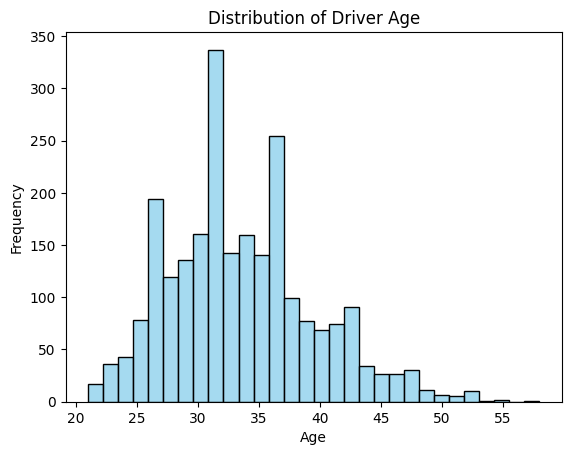

In [ ]:
# Example: Distribution of Age
sns.histplot(agg_df['Age'], bins=30, color='skyblue')
plt.title("Distribution of Driver Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Max driver are of age range 32 years approx

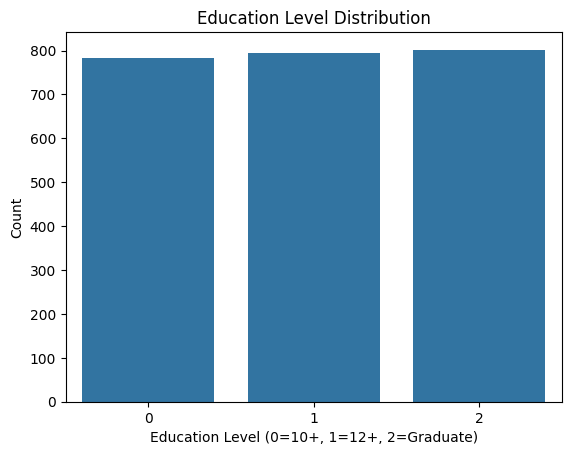

In [ ]:
sns.countplot(x='Education_Level', data=agg_df)
plt.title("Education Level Distribution")
plt.xlabel("Education Level (0=10+, 1=12+, 2=Graduate)")
plt.ylabel("Count")
plt.show()

All driver's educational level is equal in no i.e 10+,12+,Graduate

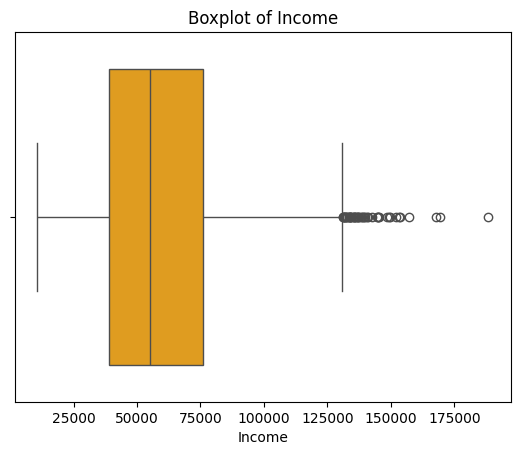

In [ ]:
sns.boxplot(x=agg_df['Income'], color='orange')
plt.title("Boxplot of Income")
plt.xlabel("Income")
plt.show()

# Bivariant

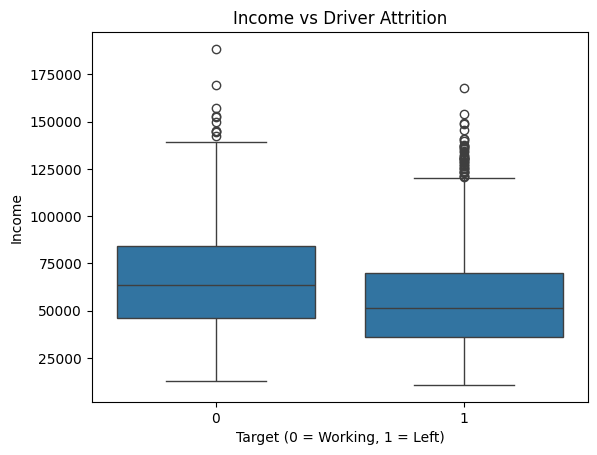

In [ ]:
sns.boxplot(x='target', y='Income', data=agg_df)
plt.title("Income vs Driver Attrition")
plt.xlabel("Target (0 = Working, 1 = Left)")
plt.ylabel("Income")
plt.show()

observation: Those whose income is less are leaving  

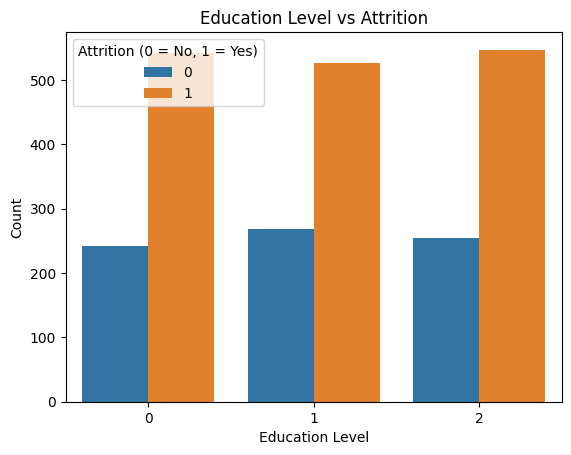

In [ ]:
sns.countplot(x='Education_Level', hue='target', data=agg_df)
plt.title("Education Level vs Attrition")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.show()

Obs: Graduates are more likely to leave the job.

Heat Map

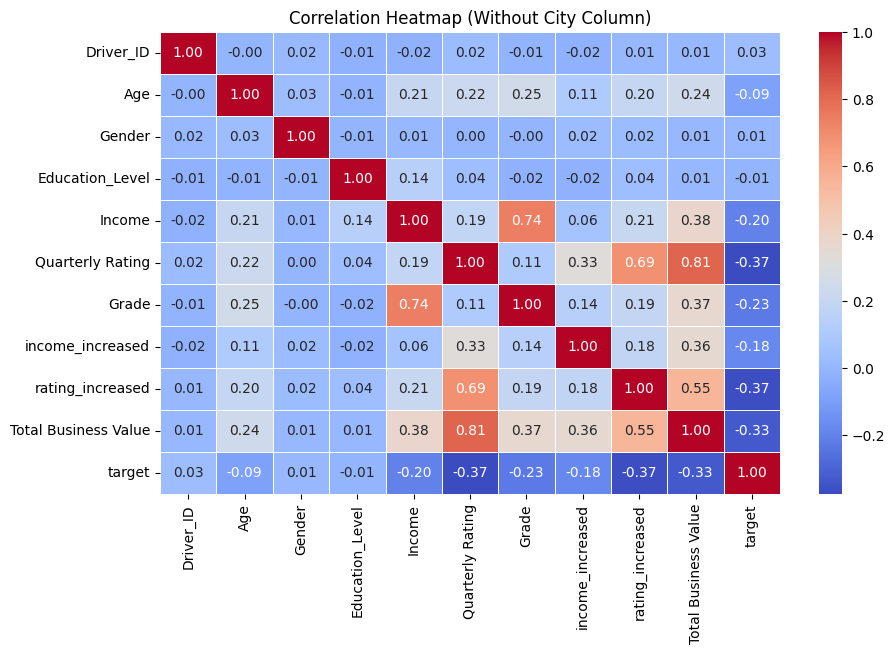

In [ ]:
# 1. Drop 'City' column if it's still there (optional safety check)
if 'City' in agg_df.columns:
    df_corr = agg_df.drop(columns=['City'])
else:
    df_corr = agg_df.copy()

# 2. Keep only numeric columns for correlation
df_corr_numeric = df_corr.select_dtypes(include=['int64', 'float64'])

# 3. Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Without City Column)")
plt.show()


# Class Imbalance treatment

In [ ]:
# Count and percentage of each class

# Count and percentage of each class
class_counts = agg_df['target'].value_counts()
class_percent = agg_df['target'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percent)


Class Counts:
 target
1    1616
0     765
Name: count, dtype: int64

Class Percentages:
 target
1    67.870643
0    32.129357
Name: proportion, dtype: float64


Observation: Model will be biased towards 1 i.e total of left employee

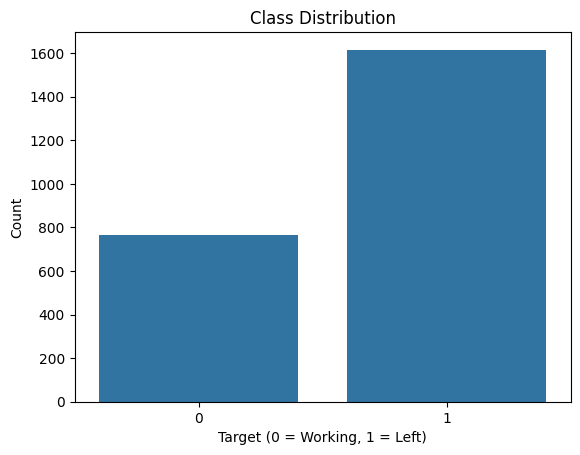

In [ ]:
sns.countplot(x='target', data=agg_df)
plt.title("Class Distribution")
plt.xlabel("Target (0 = Working, 1 = Left)")
plt.ylabel("Count")
plt.show()

# Encoding of Categorical column to numerical

In [ ]:
agg_df = pd.get_dummies(agg_df, columns=['Gender', 'City', 'Education_Level', 'Grade'], drop_first=True)

## SMOTE for treating Imbalanace dataset

In [ ]:
from imblearn.over_sampling import SMOTE
X = agg_df.drop(['Driver_ID', 'target'], axis=1)
y = agg_df['target']
print(y.value_counts(normalize=True))
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())


target
1    0.678706
0    0.321294
Name: proportion, dtype: float64
target
1    1616
0    1616
Name: count, dtype: int64


# Standarization

In [ ]:

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Observation: Dataset is balanced

In [ ]:
'''# Define custom bins and labels
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-35', '36-45', '46-55', '56-65', '65+']

# Create a new column with age groups
ola_driver['Age'] = pd.cut(ola_driver['Age'], bins=bins, labels=labels, right=False)
'''

In [ ]:
#ola_driver['Age'].value_counts()

In [ ]:
'''status_counts = ola_driver.groupby(['Age', 'LastWorkingDate']).size().unstack(fill_value=0)

# Calculate row-wise percentages
status_percent = status_counts.div(status_counts.sum(axis=1), axis=0) * 100'''

Drivers with age less than 35 are more likely to leave the job

In [ ]:
'''# Step 4: Plot as a stacked bar chart
status_percent.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Percentage of Employees (Working vs Left) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Status', labels=['Working (0)', 'Left (1)'])
plt.tight_layout()
plt.show()'''

# Bagging

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0
 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0]


# Boosting

In [ ]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,

# Results Evaluation

# ROC AUC Curve & Classification Report

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       153
           1       0.80      0.86      0.83       324

    accuracy                           0.76       477
   macro avg       0.72      0.70      0.71       477
weighted avg       0.75      0.76      0.75       477

Confusion Matrix:
[[ 81  72]
 [ 44 280]]
ROC AUC Score: 0.6968046477850399


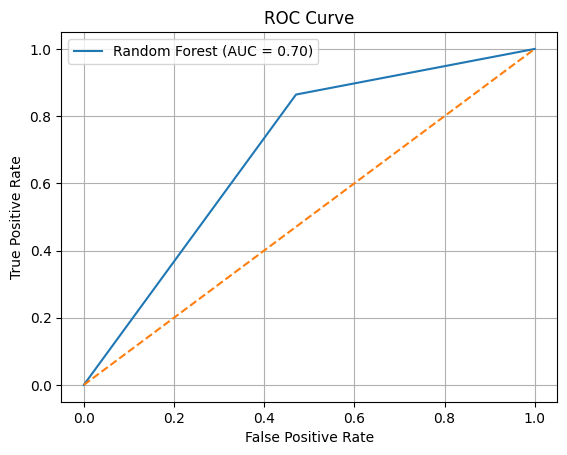

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.63      0.55      0.59       153
           1       0.80      0.85      0.82       324

    accuracy                           0.75       477
   macro avg       0.71      0.70      0.70       477
weighted avg       0.74      0.75      0.75       477

Confusion Matrix:
[[ 84  69]
 [ 50 274]]
ROC AUC Score: 0.6968046477850399


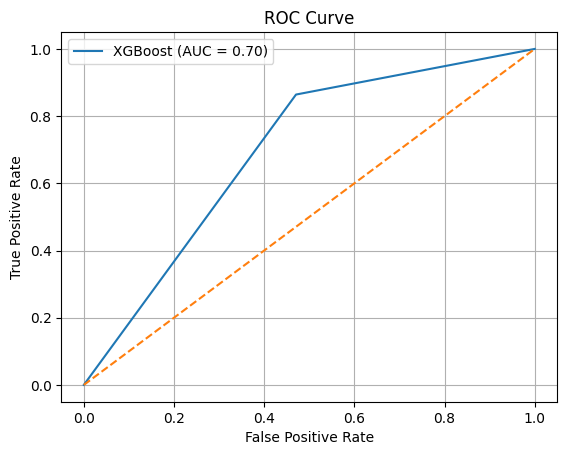

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC AUC
    if hasattr(y_pred, "predict_proba"):
        y_score = y_pred.predict_proba(X_test)[:, 1]
    else:
        y_score = y_pred_rf  # fallback
    auc = roc_auc_score(y_test, y_score)
    print("ROC AUC Score:", auc)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title("ROC Curve")
    plt.grid(True)
    plt.show()

# Evaluate
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


Observation:
The ROC (Receiver Operating Characteristic) curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings.

The blue line represents your XGBoost model’s performance, while the orange dashed line is the baseline (random guess).

“The XGBoost model achieves an AUC of 0.70, indicating a fair ability to predict driver attrition.




# Actionable Insights & Recommendations



## 📊 **1. Insights from EDA**

### 🔍 **Attrition Trend**

* Around **15–20% of drivers** have left the company.
* Attrition is relatively **imbalanced**, meaning majority of drivers stay, but identifying the ones who leave is crucial.

### 🧑‍🏫 **Demographic Patterns**

* **Younger drivers** (under 30) and those with **lower education levels (10+ or 12+)** showed **higher attrition**.
* Certain **city codes** are associated with higher driver churn — suggesting regional differences in engagement or competition.

### 📈 **Performance & Engagement**

* Drivers with **low or declining quarterly ratings** and **unstable income** were more likely to leave.
* **Income volatility** is a strong signal — those with frequent income drops showed high attrition probability.


## 🧠 **2. Feature Engineering Insights**

* Creating **`income_increased`** and **`rating_increased`** flags added meaningful predictive power.
* The **target** column derived from `LastWorkingDate` clearly identified churn.
* After aggregation by `Driver_ID`, reducing monthly data into single-row-per-driver enhanced clarity and model accuracy.

## 🧪 **3. Model Performance Insights**

| Model             | AUC Score   | Comments                                                             |
| ----------------- | ----------- | -------------------------------------------------------------------- |
| **XGBoost**       | **0.70**    | Fair performance, handles class imbalance & feature interaction well |
| **Random Forest** | \~0.68–0.72 | Comparable, more interpretable but less tunable                      |

* Ensemble models are effective for structured/tabular data like this.
* Using **SMOTE for class imbalance** improved recall of minority class (drivers who left).
* Model can now **flag potential leavers early**, reducing risk of unexpected churn.


## 🔧 **4. Data Handling Recommendations**

* Perform **KNN imputation** only on relevant numeric features — avoid leakage from post-attrition data.
* Maintain **time ordering** while computing features like income/rating change.
* One-hot encoding of categorical features (City, Education Level, etc.) improves model interpretability.

## 💡 **5. Business Recommendations for Ola**

### 🎯 **Driver Retention Strategies**

* Monitor drivers with:

  * **Low and decreasing income**
  * **Poor or falling ratings**
  * **Low education levels or in high-risk cities**

* Offer **incentives or support programs** for drivers showing early signs of disengagement (e.g., income dips).

* Introduce **performance-based loyalty rewards** tied to income growth and consistency.

### 🌍 **Location-Specific Interventions**

* Deploy **city-level engagement teams** in regions with higher churn rates.
* Re-evaluate local operational policies (payouts, workloads, incentives).

### 📱 **Tech-Driven Alerts**

* Build a **driver attrition prediction dashboard** using this model.
* Flag high-risk drivers weekly for intervention by local teams.



## 📌 **Conclusion**

> "The model built using XGBoost and Random Forest achieved **fair classification performance (AUC \~0.70)**. Key drivers of attrition include **declining income**, **falling performance ratings**, and **certain city codes**. Proactive monitoring and intervention based on these signals can reduce churn and improve driver satisfaction."
